# Assignment 2

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

First, run the following block to set up the variables needed for later sections.

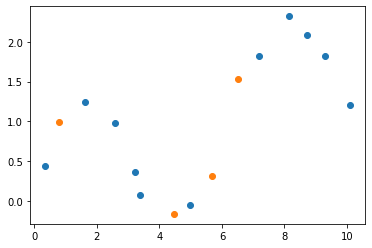

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

np.random.seed(0)
n = 15
x = np.linspace(0, 10, n)+ np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label= 'testing data')

part1_scatter()


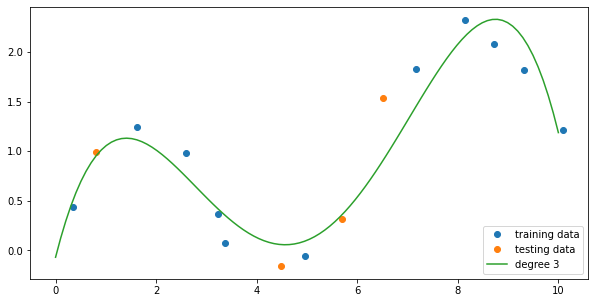

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# apply polynomial features
X_train_1 = X_train[:, np.newaxis]
X_test_1 = X_test[:, np.newaxis]

poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train_1)
X_test_poly = poly.fit(X_test_1)

#fit poly data into linear regression
linReg = LinearRegression()
linReg.fit(X_train_poly, y_train)

#generate 100 sample for result
samp = np.linspace(0,10,100)[:, np.newaxis]
samp_poly=poly.transform(samp)
samp_pred = linReg.predict(samp_poly)


#plot the graph
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(X_train, y_train, 'o', label='training data')
plt.plot(X_test, y_test, 'o', label='testing data')
plt.plot(np.linspace(0,10,100), samp_pred, label='degree 3')
plt.legend(loc=4)


In [3]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # transform the degree of input
    X_train_1 = X_train[:, np.newaxis]
    X_test_1 = X_test[:, np.newaxis]
        
    result = [];

    # Your code here
    for degree in [1,3,6,9]:
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train_1)
        X_test_poly = poly.transform(X_test_1)

        # fit the linear regression on data
        linReg = LinearRegression()
        linReg.fit(X_train_poly, y_train)

        #generate 100 sample for result
        samp = np.linspace(0,10,100)[:, np.newaxis]
        samp_poly=poly.transform(samp)
        samp_pred = linReg.predict(samp_poly)

        result.append(samp_pred)
         
    result_array = np.array(result)
    return result_array

# answer_one()
    

### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [9]:
#lets find the score for 4
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#prepare the data X_train
X_train_2 = X_train[:, np.newaxis]
X_test_2 = X_test[:, np.newaxis]

# polynomial features
poly = PolynomialFeatures(degree=4)
X_train_poly_2 = poly.fit_transform(X_train_2)
X_test_poly_2 = poly.transform(X_test_2)

#Linear model
linModel = LinearRegression()
linModel.fit(X_train_poly_2, y_train)


r2_train = r2_score(y_train, linModel.predict(X_train_poly_2))
print(r2_train)

r2_test = r2_score(y_test, linModel.predict(X_test_poly_2))
print(r2_test)

0.9194194471769332
0.7300494281870692


In [13]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score

    # reshape the X
    X_train_2 = X_train[:, np.newaxis]
    X_test_2 = X_test[:, np.newaxis]

    #result
    result_train = []
    result_test = []

    # Your code here
    for i in range(0,10):
        # polynomial features
        poly = PolynomialFeatures(degree=i)
        X_train_poly_2 = poly.fit_transform(X_train_2)
        X_test_poly_2 = poly.transform(X_test_2)

        #Linear model
        linModel = LinearRegression()
        linModel.fit(X_train_poly_2, y_train)

        r2_train = r2_score(y_train, linModel.predict(X_train_poly_2))
        r2_test = r2_score(y_test, linModel.predict(X_test_poly_2))
        
        result_train.append(r2_train)
        result_test.append(r2_test)
    
    return (np.array(result_train), np.array(result_test))

print(answer_two()[0].shape)

(10,)


### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship between degree level and $R^2$. Remember to comment out the import matplotlib line before submission.

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`. There might be multiple correct solutions, however, you only need to return one possible solution, for example, (1,2,3).* 

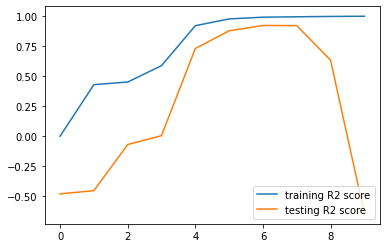

In [22]:
# try to draw the plot from question 2
import matplotlib.pyplot as plt
%matplotlib inline

ans_two = answer_two()

plt.figure()
plt.plot(range(0,10), ans_two[0], label='training R2 score')
plt.plot(range(0,10), ans_two[1], label='testing R2 score')
plt.legend(loc=4)


In [17]:
def answer_three():
    


    return (0,10,7)

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

X_train_4 = X_train[:, np.newaxis]
X_test_4 = X_test[:, np.newaxis]

# poly nomial feature with degree 12
poly = PolynomialFeatures(degree=12)
X_train_4_poly = poly.fit_transform(X_train_4)
X_test_4_poly = poly.transform(X_test_4)

#simple linear Regression
linReg = LinearRegression().fit(X_train_4_poly, y_train)
y_4_pred = linReg.predict(X_test_4_poly);
y_4_r2_score = r2_score(y_test, y_4_pred)

#Lasso regression with regulization
lassoReg = Lasso(alpha=0.01, max_iter=10000)
lassoReg.fit(X_train_4_poly, y_train)
y_4_pred_lasso = lassoReg.predict(X_test_4_poly);
y_4_r2_score_lasso =r2_score(y_test, y_4_pred_lasso)

print(y_4_r2_score)
print(y_4_r2_score_lasso)

-4.312001797698648
0.8406625614750249


/home/savan/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(


In [6]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score

    X_train_4 = X_train[:, np.newaxis]
    X_test_4 = X_test[:, np.newaxis]

    # poly nomial feature with degree 12
    poly = PolynomialFeatures(degree=12)
    X_train_4_poly = poly.fit_transform(X_train_4)
    X_test_4_poly = poly.transform(X_test_4)

    #simple linear Regression
    linReg = LinearRegression().fit(X_train_4_poly, y_train)
    y_4_pred = linReg.predict(X_test_4_poly);
    y_4_r2_score = r2_score(y_test, y_4_pred)

    #Lasso regression with regulization
    lassoReg = Lasso(alpha=0.01, max_iter=10000)
    lassoReg.fit(X_train_4_poly, y_train)
    y_4_pred_lasso = lassoReg.predict(X_test_4_poly);
    y_4_r2_score_lasso =r2_score(y_test, y_4_pred_lasso)

    return (y_4_r2_score, y_4_r2_score_lasso)

    
answer_four()

/home/savan/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(


(-4.312001797698648, 0.8406625614750249)

## Part 2 - Classification

Here's an application of machine learning that could save your life! For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `readonly/mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

mush_df = pd.read_csv('../week1/refereneces/Files_all/Files/home/jovyan/work/readonly/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)
# print(mush_df2.head())
print(mush_df.shape)
print(mush_df2.shape)

X_mush = mush_df2.iloc[:, 2:]
y_mush = mush_df2.iloc[:, 1]
print(X_mush.shape)
print(y_mush.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush)

X_subset = X_test2
y_subset = y_test2


(8124, 23)
(8124, 119)
(8124, 117)
(8124,)


### Question 5

Using `X_train2` and `y_train2` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

As a reminder, the feature names are available in the `X_train2.columns` property, and the order of the features in `X_train2.columns` matches the order of the feature importance values in the classifier's `feature_importances_` property. 

*This function should return a list of length 5 containing the feature names in descending order of importance.*

*Note: remember that you also need to set random_state in the DecisionTreeClassifier.*

In [71]:
# import decesionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

decesionTreeModel = DecisionTreeClassifier(random_state=0)

decesionTreeModel.fit(X_train2, y_train2)

most_features_frame = pd.DataFrame(data=decesionTreeModel.feature_importances_, columns=['importance'], index=X_train2.columns).sort_values(by=['importance'],ascending=False)

# print(most_features_frame)
top_5_feature = most_features_frame.index[:5]
top_5_feature_list = [i for i in top_5_feature]
print(top_5_feature_list)

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']


In [73]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier

    decesionTreeModel = DecisionTreeClassifier(random_state=0)
    decesionTreeModel.fit(X_train2, y_train2)
    most_features_frame = pd.DataFrame(data=decesionTreeModel.feature_importances_, columns=['importance'], index=X_train2.columns).sort_values(by=['importance'],ascending=False)

    top_5_feature = most_features_frame.index[:5]
    top_5_feature_list = [i for i in top_5_feature]

    return top_5_feature_list
    
answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Question 6

For this question, we're going to use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Cla
ssifier (`SVC`) with varying parameter values.  Recall that the validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.

**Because creating a validation curve requires fitting multiple models, for performance reasons this question will use just a subset of the original mushroom dataset: please use the variables X_subset and y_subset as input to the validation curve function (instead of X_mush and y_mush) to reduce computation time.**

The initialized unfitted classifier object we'll be using is a Support Vector Classifier with radial basis kernel.  So your first step is to create an `SVC` object with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  

With this classifier, and the dataset in X_subset, y_subset, explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`). Recall that you can specify what scoring metric you want validation_curve to use by setting the "scoring" parameter.  In this case, we want to use "accuracy" as the scoring metric.

For each level of `gamma`, `validation_curve` will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

Find the mean score across the three models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return one tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

In [17]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

X, y = load_iris(return_X_y=True)
# print(X)
# print(y)

indices = np.arange(y.shape[0])
# print("---------------------------")
# print(indices)

np.random.shuffle(indices)
# print(indices)

X, y = X[indices], y[indices]

train_score, valid_score = validation_curve(
    Ridge(), X, y, param_name="alpha", param_range=np.logspace(-7, 3, 5),
    cv=3
)

print(train_score)
print(valid_score)

print(np.logspace(-4,1,6))


[[0.93366661 0.93027929 0.92738277]
 [0.93366661 0.93027929 0.92738277]
 [0.93366654 0.93027912 0.92738267]
 [0.93102682 0.92659679 0.92435817]
 [0.46097345 0.44232926 0.44720932]]
[[0.92195542 0.92151528 0.92976117]
 [0.92195541 0.92151538 0.9297612 ]
 [0.92195219 0.92154696 0.92976801]
 [0.92013808 0.91870747 0.92746097]
 [0.4444265  0.35950324 0.40397856]]
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

train_score, test_score = validation_curve(SVC(kernel='rbf', C=1, random_state=0), X_subset, y_subset, param_name='gamma', param_range=np.logspace(-4,1,6), scoring="accuracy", cv=3)


In [79]:
#find mean of train_score
train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)

print(train_mean)
print(test_mean)

[0.61201379 0.92589857 0.99089119 1.         1.         1.        ]
[0.60659774 0.92516002 0.98966027 0.99803053 0.99359921 0.51304776]


In [80]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve

    train_score, test_score = validation_curve(SVC(kernel='rbf', C=1, random_state=0), X_subset, y_subset, param_name='gamma', param_range=np.logspace(-4,1,6), scoring="accuracy", cv=3)
    train_mean = np.mean(train_score, axis=1)
    test_mean = np.mean(test_score, axis=1)

    return (train_mean, test_mean)

### Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting (and has the worst test set accuracy)? What gamma value corresponds to a model that is overfitting (and has the worst test set accuracy)? What choice of gamma would be the best choice for a model with good generalization performance on this dataset (high accuracy on both training and test set)? 

Hint: Try plotting the scores from question 6 to visualize the relationship between gamma and accuracy. Remember to comment out the import matplotlib line before submission.

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)` Please note there is only one correct solution.*

plot the visulization graph with gama and validation curve cross fold result

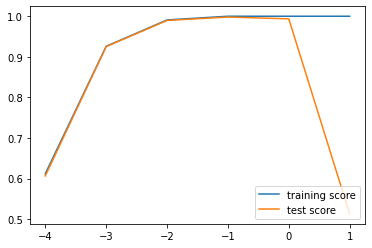

In [82]:
# try to draw the plot from question 2
import matplotlib.pyplot as plt
%matplotlib inline

train_score, test_score = answer_six()

plt.figure()
plt.plot(range(-4,2), train_score, label="training score")
plt.plot(range(-4,2), test_score, label="test score")
plt.legend(loc=4)


In [ ]:
def answer_seven():
    
    # (Underfitting, Overfitting, Good_Generalization)
    return (-4, 1, -1)